In [1]:
%load_ext autoreload
%autoreload 2
import os

while not os.getcwd().endswith("naml_exams"):
    os.chdir("..")

# Exercise 1

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

This dataset contains the chemical fingerprint of different samples of glass belonging to different classes.
 The study of classification of types of glass was motivated by criminological investigation. At the scene of the
 crime, the glass left can be used as evidence. If it is correctly identified!
 Attribute Information:
 - Id number: 1 to 214
 - RI: refractive index
 - Na: Sodium
 - Mg: Magnesium
 - Al: Aluminum
 - Si: Silicon
 - K: Potassium
 - Ca: Calcium
 - Ba: Barium
 - Fe: Iron
 - Type of glass: (class attribute)
   1. building windows float processed
   2. building windows non float processed
   3. vehicle windows float processed
   4. vehicle windows non float processed (none in this database)
   5. containers
   6. tableware
   7. headlamps

In [3]:
data = pd.read_csv('data/glass.data', names=['Id', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca','Ba', 'Fe','Type'])
data.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [15]:
names = np.array(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca','Ba', 'Fe'])
print(names)

['RI' 'Na' 'Mg' 'Al' 'Si' 'K' 'Ca' 'Ba' 'Fe']


In [4]:
data_np = data.to_numpy()

labels_full = data_np[:,-1]
A_full = data_np[:, 1:-1].transpose()

labels_full.shape, A_full.shape

((214,), (9, 214))

Extract the samples of type class 1 (building windows float processed) and 7 (headlamps). How many samples belong to the two groups?

In [5]:
mask = np.logical_or(labels_full == 1, labels_full == 7)
A = A_full[:, mask]
labels = labels_full[mask]

A.shape

(9, 99)

In [6]:
class_1 = A[:, labels == 1]
class_7 = A[:, labels == 7]

n_class_1 = class_1.shape[1]
n_class_7 = class_7.shape[1]

print('There are %d class_1 samples' %n_class_1)
print('There are %d class_7 samples' %n_class_7)

There are 70 class_1 samples
There are 29 class_7 samples


Normalize the data so that each feature has zero mean and unitary standard deviation.

In [8]:
A_mean = A.mean()
A_std = A.std()

normalized_A = ((A - A_mean) / A_std)

print('Normalized A mean = %1.2f' %normalized_A.mean())
print('Normalized A std = %1.2f' %normalized_A.std())

Normalized A mean = -0.00
Normalized A std = 1.00


Perform PCA on the dataset by means of the SVD decomposition (do not consider the ”Id” as a feature!). Then, plot the trend of singular values,cumulative fraction of singular values and explained variance.

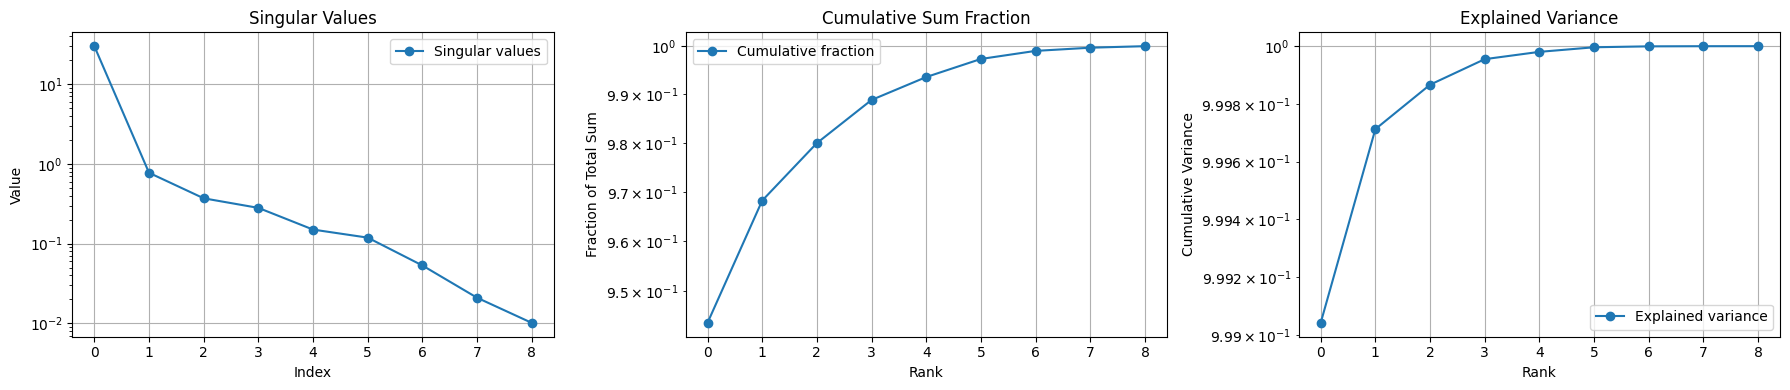

In [50]:
U, s, VT = np.linalg.svd(normalized_A, full_matrices=False)

# Compute cumulative metrics
cum_sum = np.cumsum(s)
cum_frac = cum_sum / np.sum(s)
cum_var = np.cumsum(s**2) / np.sum(s**2)

# Plotting
fig, axs = plt.subplots(1, 3, figsize=(18, 4))

# Singular values
axs[0].semilogy(s, 'o-', label='Singular values')
axs[0].set_title('Singular Values')
axs[0].set_xlabel('Index')
axs[0].set_ylabel('Value')
axs[0].legend()
axs[0].grid(True)

# Cumulative sum (not squared)
axs[1].semilogy(cum_frac, 'o-', label='Cumulative fraction')
axs[1].set_title('Cumulative Sum Fraction')
axs[1].set_xlabel('Rank')
axs[1].set_ylabel('Fraction of Total Sum')
axs[1].legend()
axs[1].grid(True)

# Explained variance
axs[2].semilogy(cum_var, 'o-', label='Explained variance')
axs[2].set_title('Explained Variance')
axs[2].set_xlabel('Rank')
axs[2].set_ylabel('Cumulative Variance')
axs[2].legend()
axs[2].grid(True)

plt.tight_layout()
plt.show()

Compute a matrix containing the principal components associated with the dataset.

In [13]:
Phi = np.matmul(U.transpose(), normalized_A)
Phi.shape

(9, 99)

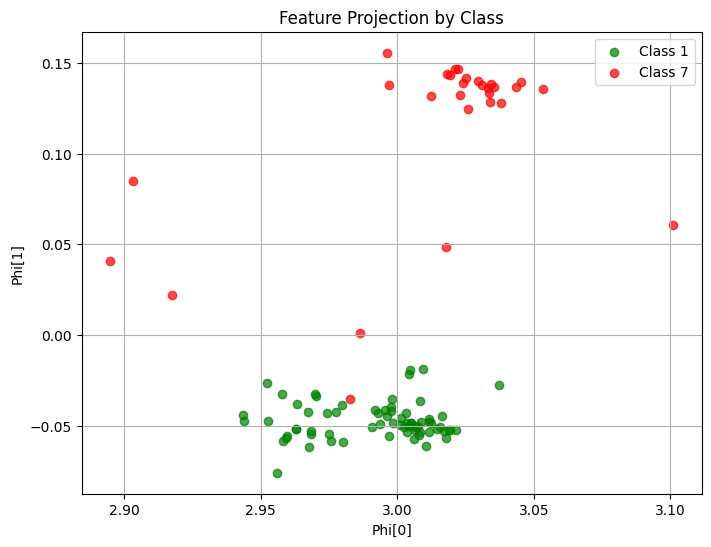

In [14]:
# Separate indices for each class
idx_class_1 = labels == 1
idx_class_7 = labels == 7

# Plot both classes at once using masking
plt.figure(figsize=(8, 6))
plt.scatter(Phi[0, idx_class_1], Phi[1, idx_class_1], color='g', label='Class 1', alpha=0.7)
plt.scatter(Phi[0, idx_class_7], Phi[1, idx_class_7], color='r', label='Class 7', alpha=0.7)

plt.xlabel('Phi[0]')
plt.ylabel('Phi[1]')
plt.title('Feature Projection by Class')
plt.legend()
plt.grid(True)
plt.show()

Consider now the first principle component. By looking at the components of the first principal direction, do you expect building windows float (class_1) processed glasses to have a large or small concentration of magnesium and aluminium, respectively? And what about headlamps glasses (class_7)?

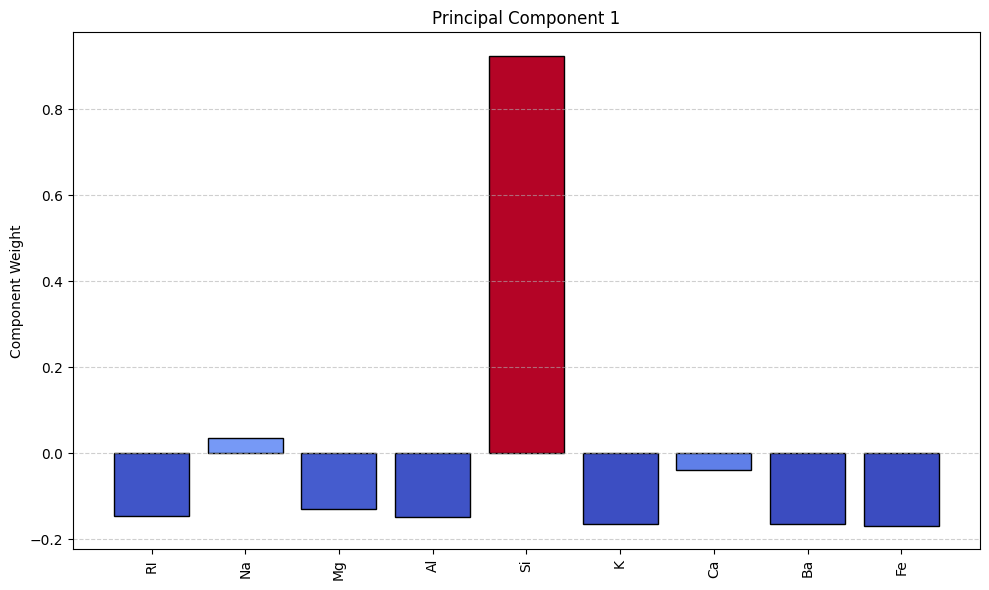

In [26]:
# Select weights for the first principal component
weights = U[:, 0]

# Normalize the weights for color mapping
norm = colors.Normalize(vmin=weights.min(), vmax=weights.max())
bar_colors = cm.coolwarm(norm(weights))  # Choose a colormap

# Create the plot
plt.figure(figsize=(10, 6))
plt.bar(names, weights, color=bar_colors, edgecolor='black')
plt.title('Principal Component 1')
plt.xticks(rotation=90)
plt.ylabel('Component Weight')
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

We expect that **class_1** have **HIGH** magnesium and **HIGH** alluminium.

We expect that **class_7** have **LOW** magnesium and **LOW** alluminium.

Are your predictions confirmed by the original data?

In [28]:
subset_1 = data[data["Type"] == 1][["Mg", "Al"]]

print("Summary statistics for Type == 1:")
print("\nAverage values:")
print(subset_1.mean())

print("\nMaximum values:")
print(subset_1.max())

Summary statistics for Type == 1:

Average values:
Mg    3.552429
Al    1.163857
dtype: float64

Maximum values:
Mg    4.49
Al    1.69
dtype: float64


In [30]:
subset_7 = data[data["Type"] == 7][["Mg", "Al"]]

print("Summary statistics for Type == 7:")
print("\nAverage values:")
print(subset_7.mean())

print("\nMaximum values:")
print(subset_7.max())

Summary statistics for Type == 7:

Average values:
Mg    0.538276
Al    2.122759
dtype: float64

Maximum values:
Mg    3.34
Al    2.88
dtype: float64


Prediction are not confirmed meaning that also the other principal components have large influence on these 2 features.

# Exercise 2

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import jax
np.random.seed(0)

Consider the following function (where $\textbf{x} = (x, y)$)
$$ f(\textbf{x}) = (x + 2y − 7)^2 + (2x + y − 5)^2 $$

In [32]:
def f(x, y):
    return (x + 2 * y - 7) ** 2 + (2 * x + y - 5) ** 2

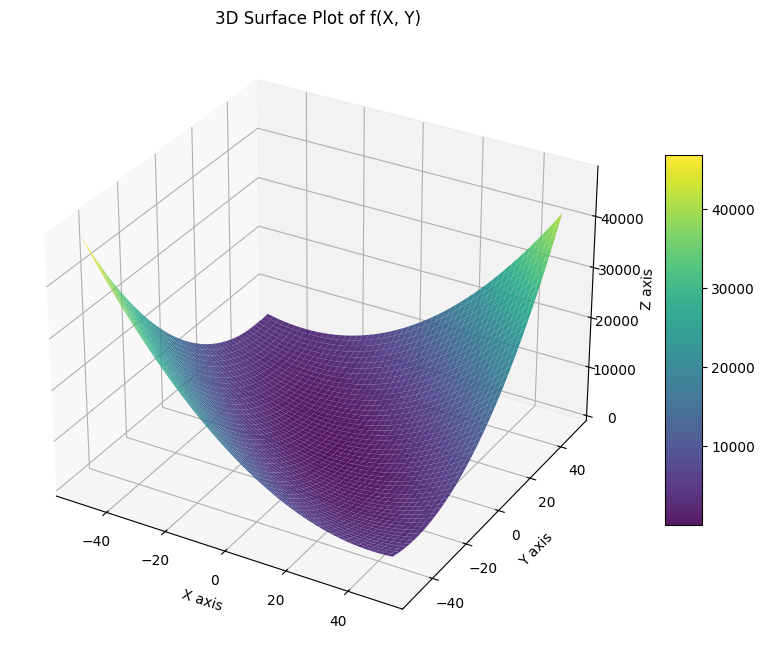

In [ ]:
x = np.linspace(-50, 50, 300)  # reduced resolution for faster plotting
y = np.linspace(-50, 50, 300)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1, projection="3d")

# Use a colormap for better visualization
surf = ax.plot_surface(X, Y, Z, cmap="viridis", edgecolor="none", alpha=0.9)

# Add color bar to indicate the Z value
fig.colorbar(surf, ax=ax, shrink=0.6, aspect=10)

# Set labels
ax.set_xlabel("X axis")
ax.set_ylabel("Y axis")
ax.set_zlabel("Z axis")

# Add a title
ax.set_title("3D Surface Plot of f(X, Y)")


plt.show()

Compute analitically the value $\textbf{x}_{min}$ where the function attains its minimum value and $f(\textbf{x}_{min})$.

We compute the exact gradient of the function:
$$ \nabla f(x,y) = \begin{bmatrix} 10x + 8y -34 \\ 8x + 10y - 38 \end{bmatrix} $$
We set the gradient equal to zero to obtain:
$$ (x,y)_{min} = (1,3) \\
f((x,y)_{min}) = 0 $$

In [39]:
#Check with the numpy function
A = np.array([[10, 8],
              [8, 10]])
b = np.array([34, 38])

solution = np.linalg.solve(A, b)
x_min, y_min = solution
print(f"Minimum at: {solution} with value {f(x_min,y_min)}")

Minimum at: [1. 3.] with value 0.0


Implement the gradient descent (GD) method
$$ x^{k+1} = x^k - \alpha \nabla f(x^k) \quad $$
where $\alpha$ is the learning rate. Use the stopping criterium $E < \epsilon$ where E is the absolute value of the
difference of the last two functional values i.e.

$$
E = |f(x^{k+1}) - f(x^k)| \quad $$
and $\epsilon$ is the required tolerance. Moreover set the maximum number of iterations to 200

In [ ]:
def GD(f, learning_rate, tol):
    df_jit = jax.jit(jax.grad(f, argnums=[0, 1]))
    f_jit = jax.jit(f)
    # random initial_guess
    x = np.random.randn(2)
    x_old = x.copy()
    max_iter = 200
    E_history = list()

    for i in range(max_iter):
        grad = np.array(df_jit(x[0], x[1]))
        x -= learning_rate * grad
        E = np.abs(f_jit(x[0], x[1]) - f_jit(x_old[0], x_old[1]))
        error = np.linalg.norm(x - min)
        E_history.append(error)
        if E < tol:
            break
        x_old = x.copy()

    print("tot_iter: %d" % i)
    return x, E_history

tot_iter: 139
Learning rate = 0.01
Minimum found at: [1.10932834 2.89067162]
Function value at minimum: 0.023905

tot_iter: 24
Learning rate = 0.10
Minimum found at: [1.01456014 3.00259501]
Function value at minimum: 0.001396



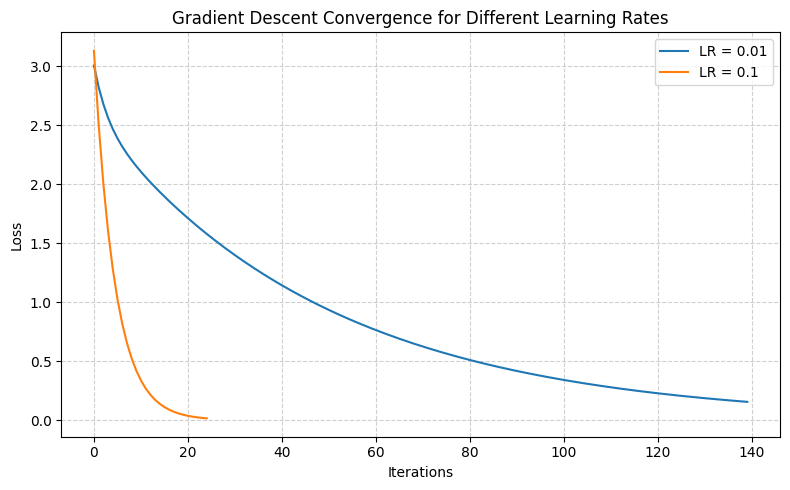

In [46]:
# Tolerance
tol = 1e-3

# Learning rates to test
learning_rates = [0.01, 0.1]
results = []

# Run Gradient Descent for each learning rate
for lr in learning_rates:
    x_min, history = GD(f, lr, tol)
    results.append({
        "lr": lr,
        "x_min": x_min,
        "history": history,
        "final_val": f(x_min[0], x_min[1])
    })
    print(f"Learning rate = {lr:.2f}")
    print(f"Minimum found at: {x_min}")
    print(f"Function value at minimum: {f(x_min[0], x_min[1]):.6f}\n")

# Plot convergence history
plt.figure(figsize=(8, 5))
for res in results:
    plt.plot(res["history"], label=f"LR = {res['lr']}")

plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Gradient Descent Convergence for Different Learning Rates")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Implement the GD with momentum (GDM) i.e.
$$ z^{k+1} = \beta z^k + \nabla f(x^k), \quad (4) \\
x^{k+1} = x^k - \alpha z^{k+1} \quad (5) $$
where α is the learning rate and $\beta$ is the momentum coefficient. Use the same stopping criterium used in
the GD method

In [44]:
def GDM(f, learning_rate, momentum_coeff, tol):
    df_jit = jax.jit(jax.grad(f, argnums=[0, 1]))
    f_jit = jax.jit(f)
    # random initial_guess
    x = np.random.randn(2)
    x_old = x.copy()
    max_iter = 200
    E_history = list()

    momentum = np.zeros(x.shape)
    for i in range(max_iter):
        grad = np.array(df_jit(x[0], x[1]))
        momentum = momentum * momentum_coeff + grad
        x -= learning_rate * momentum
        E = np.abs(f_jit(x[0], x[1]) - f_jit(x_old[0], x_old[1]))
        error = np.linalg.norm(x - min)
        E_history.append(error)
        if E < tol:
            break
        x_old = x.copy()

    print("tot_iter: %d" % i)
    return x, E_history

Apply the GDM method with $ \epsilon = 10^{−3}$, $α = 0.01, 0.1$ and $\beta = 0.5, 0.9$. Plot the convergence history and comment the results.

tot_iter: 7
Learning rate = 0.01, Momentum = 0.5
Minimum found at: [1.65232866 2.54400856]
Function value at minimum: 0.7876540971916387

tot_iter: 15
Learning rate = 0.10, Momentum = 0.5
Minimum found at: [1.00475745 3.00183617]
Function value at minimum: 0.0001999082290817675

tot_iter: 71
Learning rate = 0.01, Momentum = 0.9
Minimum found at: [0.93364295 2.9959222 ]
Function value at minimum: 0.024264162996539707

tot_iter: 87
Learning rate = 0.10, Momentum = 0.9
Minimum found at: [1.00507322 3.02514787]
Function value at minimum: 0.0043114101372296



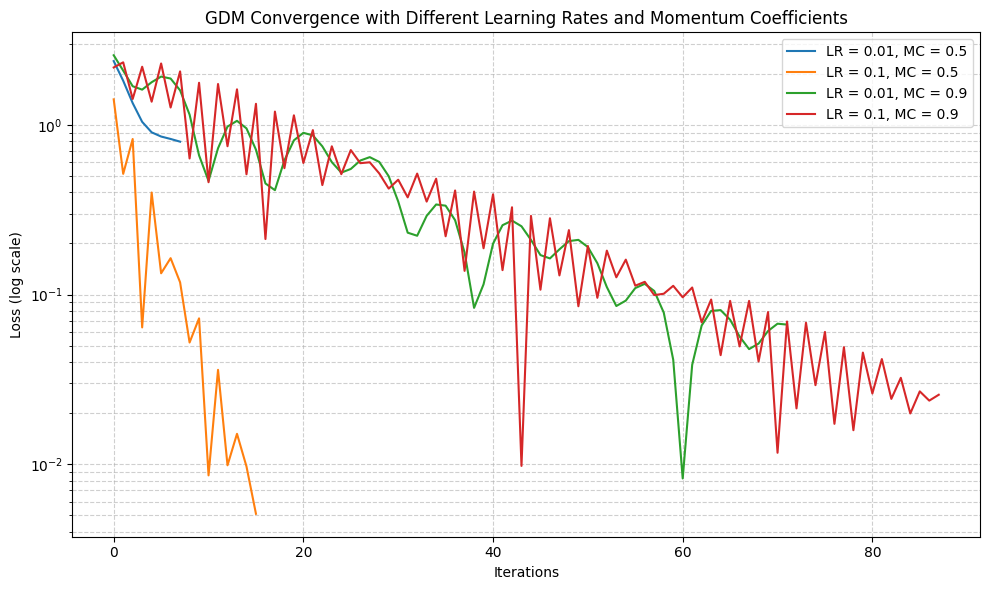

In [45]:
# Define hyperparameter combinations
configs = [
    {"lr": 0.01, "mc": 0.5},
    {"lr": 0.1,  "mc": 0.5},
    {"lr": 0.01, "mc": 0.9},
    {"lr": 0.1,  "mc": 0.9},
]

tol = 1e-3
results = []

# Run GDM for each configuration
for config in configs:
    x_min, history = GDM(f, config["lr"], config["mc"], tol)
    results.append({
        "lr": config["lr"],
        "mc": config["mc"],
        "x_min": x_min,
        "history": history,
        "final_val": f(x_min[0], x_min[1])
    })
    print(f"Learning rate = {config['lr']:.2f}, Momentum = {config['mc']:.1f}")
    print(f"Minimum found at: {x_min}")
    print(f"Function value at minimum: {f(x_min[0], x_min[1])}")
    print()

# Plotting
plt.figure(figsize=(10, 6))
for res in results:
    label = f"LR = {res['lr']}, MC = {res['mc']}"
    plt.semilogy(res["history"], label=label)

plt.xlabel("Iterations")
plt.ylabel("Loss (log scale)")
plt.title("GDM Convergence with Different Learning Rates and Momentum Coefficients")
plt.legend()
plt.grid(True, which='both', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Adding a momentum to the method makes it converge faster, in general, but adds some "instabilities" in the convergence history, due to giving to the history of the gradient a bigger or smaller importance in the computation of the updated approximate solution.